In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/AI Bootcamp/EDA/2C-Pandas & SQL

/content/drive/MyDrive/AI Bootcamp/EDA/2C-Pandas & SQL


In [ ]:
!pip install pandas===2.0.3
!pip install pandasql===0.7.3

In [ ]:
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

In [ ]:
df = pd.read_csv('LA Crimes Data.csv')

In [ ]:
len(df)

105

In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,240207131,03/02/2024 12:00:00 AM,01/01/2016 12:00:00 AM,1800,2,Rampart,299,1,121,"RAPE, FORCIBLE",...,AA,Adult Arrest,121,NaN,NaN,NaN,1700 TOBERMAN ST,NaN,34.0398,-118.2780
1,242006745,03/02/2024 12:00:00 AM,02/07/2016 12:00:00 AM,900,20,Olympic,2029,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354,NaN,NaN,NaN,400 S VIRGIL AV,NaN,34.0667,-118.2871
2,241906409,03/03/2024 12:00:00 AM,07/07/2017 12:00:00 AM,2045,19,Mission,1955,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354,NaN,NaN,NaN,14800 BLACKHAWK ST,NaN,34.2581,-118.4542
3,240906245,03/03/2024 12:00:00 AM,01/01/2017 12:00:00 AM,1,9,Van Nuys,923,2,810,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",...,IC,Invest Cont,810,NaN,NaN,NaN,14600 GILMORE ST,NaN,34.1877,-118.4509
4,241906369,03/03/2024 12:00:00 AM,06/10/2019 12:00:00 AM,1200,19,Mission,1994,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354,NaN,NaN,NaN,8100 BRIMFIELD AV,NaN,34.2179,-118.4583


Preprocessing the dataset

In [ ]:
#Preprocessing the dataframe by adding extra columns from "Date Rptd"
#The extra columns are: year,month,hour,weekday
df["Date Rptd"] = df["Date Rptd"].astype(str)
Date_Rptd_new = df["Date Rptd"].str.split(" ", expand = True)
#Extract the date as a column
df["Date Rptd"] = Date_Rptd_new[0]

In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,240207131,03/02/2024,01/01/2016 12:00:00 AM,1800,2,Rampart,299,1,121,"RAPE, FORCIBLE",...,AA,Adult Arrest,121,NaN,NaN,NaN,1700 TOBERMAN ST,NaN,34.0398,-118.2780
1,242006745,03/02/2024,02/07/2016 12:00:00 AM,900,20,Olympic,2029,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354,NaN,NaN,NaN,400 S VIRGIL AV,NaN,34.0667,-118.2871
2,241906409,03/03/2024,07/07/2017 12:00:00 AM,2045,19,Mission,1955,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354,NaN,NaN,NaN,14800 BLACKHAWK ST,NaN,34.2581,-118.4542
3,240906245,03/03/2024,01/01/2017 12:00:00 AM,1,9,Van Nuys,923,2,810,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",...,IC,Invest Cont,810,NaN,NaN,NaN,14600 GILMORE ST,NaN,34.1877,-118.4509
4,241906369,03/03/2024,06/10/2019 12:00:00 AM,1200,19,Mission,1994,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354,NaN,NaN,NaN,8100 BRIMFIELD AV,NaN,34.2179,-118.4583


In [ ]:
#Extract the Day,Year, and Month of the complaint from the "Date_Rptd_new" column
Date_Rptd_new = df["Date Rptd"].str.split("/", expand = True)
print(Date_Rptd_new.head())
#Extract the month as a column
df["Date Rptd Month"] = Date_Rptd_new[0]
#Extract the day as a column
df["Date Rptd Day"] = Date_Rptd_new[1]
#Extract the year as a column
df["Date Rptd Year"] = Date_Rptd_new[2]
#Extract the Weekday of the complaint

    0   1     2
0  03  02  2024
1  03  02  2024
2  03  03  2024
3  03  03  2024
4  03  03  2024


In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Date Rptd Month,Date Rptd Day,Date Rptd Year
0,240207131,03/02/2024,01/01/2016 12:00:00 AM,1800,2,Rampart,299,1,121,"RAPE, FORCIBLE",...,NaN,NaN,NaN,1700 TOBERMAN ST,NaN,34.0398,-118.2780,03,02,2024
1,242006745,03/02/2024,02/07/2016 12:00:00 AM,900,20,Olympic,2029,2,354,THEFT OF IDENTITY,...,NaN,NaN,NaN,400 S VIRGIL AV,NaN,34.0667,-118.2871,03,02,2024
2,241906409,03/03/2024,07/07/2017 12:00:00 AM,2045,19,Mission,1955,2,354,THEFT OF IDENTITY,...,NaN,NaN,NaN,14800 BLACKHAWK ST,NaN,34.2581,-118.4542,03,03,2024
3,240906245,03/03/2024,01/01/2017 12:00:00 AM,1,9,Van Nuys,923,2,810,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",...,NaN,NaN,NaN,14600 GILMORE ST,NaN,34.1877,-118.4509,03,03,2024
4,241906369,03/03/2024,06/10/2019 12:00:00 AM,1200,19,Mission,1994,2,354,THEFT OF IDENTITY,...,NaN,NaN,NaN,8100 BRIMFIELD AV,NaN,34.2179,-118.4583,03,03,2024


In [ ]:
#Convert the "Created_Date" from string to datetime
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
#Extract the day of the week with values 0,1,2,3,4,5,6
df['weekday'] = df["Date Rptd"].dt.dayofweek
#Extract the weekday description instead of the number
df.loc[df['weekday'] == 0, 'weekday'] = 'MON'
df.loc[df['weekday'] == 1, 'weekday'] = 'TUE'
df.loc[df['weekday'] == 2, 'weekday'] = 'WED'
df.loc[df['weekday'] == 3, 'weekday'] = 'THU'
df.loc[df['weekday'] == 4, 'weekday'] = 'FRI'
df.loc[df['weekday'] == 5, 'weekday'] = 'SAT'
df.loc[df['weekday'] == 6, 'weekday'] = 'SUN'

In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Date Rptd Month,Date Rptd Day,Date Rptd Year,weekday
0,240207131,2024-03-02,01/01/2016 12:00:00 AM,1800,2,Rampart,299,1,121,"RAPE, FORCIBLE",...,NaN,NaN,1700 TOBERMAN ST,NaN,34.0398,-118.2780,03,02,2024,SAT
1,242006745,2024-03-02,02/07/2016 12:00:00 AM,900,20,Olympic,2029,2,354,THEFT OF IDENTITY,...,NaN,NaN,400 S VIRGIL AV,NaN,34.0667,-118.2871,03,02,2024,SAT
2,241906409,2024-03-03,07/07/2017 12:00:00 AM,2045,19,Mission,1955,2,354,THEFT OF IDENTITY,...,NaN,NaN,14800 BLACKHAWK ST,NaN,34.2581,-118.4542,03,03,2024,SUN
3,240906245,2024-03-03,01/01/2017 12:00:00 AM,1,9,Van Nuys,923,2,810,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",...,NaN,NaN,14600 GILMORE ST,NaN,34.1877,-118.4509,03,03,2024,SUN
4,241906369,2024-03-03,06/10/2019 12:00:00 AM,1200,19,Mission,1994,2,354,THEFT OF IDENTITY,...,NaN,NaN,8100 BRIMFIELD AV,NaN,34.2179,-118.4583,03,03,2024,SUN


In [ ]:
df.rename(columns = {'AREA NAME':'AREA_NAME'}, inplace = True)

In [ ]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA_NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Date Rptd Month,Date Rptd Day,Date Rptd Year,weekday
0,240207131,2024-03-02,01/01/2016 12:00:00 AM,1800,2,Rampart,299,1,121,"RAPE, FORCIBLE",...,NaN,NaN,1700 TOBERMAN ST,NaN,34.0398,-118.2780,03,02,2024,SAT
1,242006745,2024-03-02,02/07/2016 12:00:00 AM,900,20,Olympic,2029,2,354,THEFT OF IDENTITY,...,NaN,NaN,400 S VIRGIL AV,NaN,34.0667,-118.2871,03,02,2024,SAT
2,241906409,2024-03-03,07/07/2017 12:00:00 AM,2045,19,Mission,1955,2,354,THEFT OF IDENTITY,...,NaN,NaN,14800 BLACKHAWK ST,NaN,34.2581,-118.4542,03,03,2024,SUN
3,240906245,2024-03-03,01/01/2017 12:00:00 AM,1,9,Van Nuys,923,2,810,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",...,NaN,NaN,14600 GILMORE ST,NaN,34.1877,-118.4509,03,03,2024,SUN
4,241906369,2024-03-03,06/10/2019 12:00:00 AM,1200,19,Mission,1994,2,354,THEFT OF IDENTITY,...,NaN,NaN,8100 BRIMFIELD AV,NaN,34.2179,-118.4583,03,03,2024,SUN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,241209616,2024-04-06,01/01/2019 12:00:00 AM,1150,12,77th Street,1259,2,354,THEFT OF IDENTITY,...,NaN,NaN,700 E 75TH ST,NaN,33.9721,-118.2630,04,06,2024,SAT
101,241408410,2024-04-07,08/06/2019 12:00:00 AM,1610,14,Pacific,1463,2,354,THEFT OF IDENTITY,...,NaN,NaN,5300 PLAYA VISTA DR,NaN,33.9762,-118.4287,04,07,2024,SUN
102,240608355,2024-04-08,05/01/2015 12:00:00 AM,1635,6,Hollywood,632,2,354,THEFT OF IDENTITY,...,NaN,NaN,2900 GLENMANOR PL,NaN,34.1040,-118.3755,04,08,2024,MON
103,241508733,2024-04-08,01/07/2016 12:00:00 AM,850,15,N Hollywood,1549,2,354,THEFT OF IDENTITY,...,NaN,NaN,5400 TUJUNGA AV,NaN,34.1685,-118.3790,04,08,2024,MON


In [ ]:
#Number of Crimes Per Area Name Function
def Count_SSR_Area_Name():
    #The SQL query for the Number of Crimes Per Area Name
    q1 = """
    Select AREA_NAME,Count(*) as Count
    From df
    Group By AREA_NAME
    Order By Count
    ;
    """
    #Store the output of the SQL query as a dataframe
    df1 = sqldf(q1)
    #Create a figure with the height of 3 and width of 7
    fig = plt.figure(figsize=(7,3))
    #Set the canvas dimensions for the figure
    axes = fig.add_axes([0,0,1,1])
    #Plot the bar chart based on the two attributes
    axes.bar(df1.AREA_NAME,df1.Count)
    #Set the X axis label
    axes.set_xlabel('Area Name')
    #Set the Y axis label
    axes.set_ylabel('Number of Crimes')
    #Rotate the X axis label to avoid overlapping labels and to show the Agency
    plt.xticks(rotation=90)
    #Set the title of the bar chart
    axes.set_title('Number of Crimes Per Area Name')

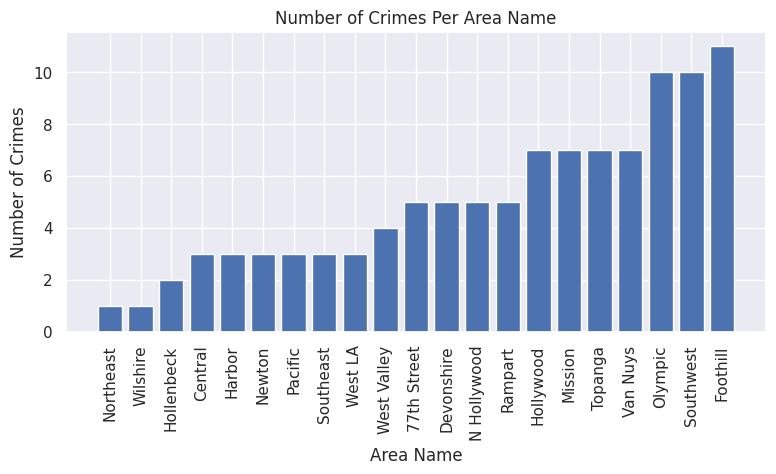

In [ ]:
Count_SSR_Area_Name()

In [ ]:
df.rename(columns = {'Vict Descent':'Vict_Descent'}, inplace = True)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA_NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Date Rptd Month,Date Rptd Day,Date Rptd Year,weekday
0,240207131,2024-03-02,01/01/2016 12:00:00 AM,1800,2,Rampart,299,1,121,"RAPE, FORCIBLE",...,NaN,NaN,1700 TOBERMAN ST,NaN,34.0398,-118.2780,03,02,2024,SAT
1,242006745,2024-03-02,02/07/2016 12:00:00 AM,900,20,Olympic,2029,2,354,THEFT OF IDENTITY,...,NaN,NaN,400 S VIRGIL AV,NaN,34.0667,-118.2871,03,02,2024,SAT
2,241906409,2024-03-03,07/07/2017 12:00:00 AM,2045,19,Mission,1955,2,354,THEFT OF IDENTITY,...,NaN,NaN,14800 BLACKHAWK ST,NaN,34.2581,-118.4542,03,03,2024,SUN
3,240906245,2024-03-03,01/01/2017 12:00:00 AM,1,9,Van Nuys,923,2,810,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",...,NaN,NaN,14600 GILMORE ST,NaN,34.1877,-118.4509,03,03,2024,SUN
4,241906369,2024-03-03,06/10/2019 12:00:00 AM,1200,19,Mission,1994,2,354,THEFT OF IDENTITY,...,NaN,NaN,8100 BRIMFIELD AV,NaN,34.2179,-118.4583,03,03,2024,SUN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,241209616,2024-04-06,01/01/2019 12:00:00 AM,1150,12,77th Street,1259,2,354,THEFT OF IDENTITY,...,NaN,NaN,700 E 75TH ST,NaN,33.9721,-118.2630,04,06,2024,SAT
101,241408410,2024-04-07,08/06/2019 12:00:00 AM,1610,14,Pacific,1463,2,354,THEFT OF IDENTITY,...,NaN,NaN,5300 PLAYA VISTA DR,NaN,33.9762,-118.4287,04,07,2024,SUN
102,240608355,2024-04-08,05/01/2015 12:00:00 AM,1635,6,Hollywood,632,2,354,THEFT OF IDENTITY,...,NaN,NaN,2900 GLENMANOR PL,NaN,34.1040,-118.3755,04,08,2024,MON
103,241508733,2024-04-08,01/07/2016 12:00:00 AM,850,15,N Hollywood,1549,2,354,THEFT OF IDENTITY,...,NaN,NaN,5400 TUJUNGA AV,NaN,34.1685,-118.3790,04,08,2024,MON


In [ ]:
#Number of Crimes Per Victim Descent Function
def Count_SSR_V_Descent():
    #The SQL query for the Number of Crimes Per Area Name
    q2 = """
    Select Vict_Descent,Count(*) as Count
    From df
    Group By Vict_Descent
    Order By Count
    ;
    """
    #Store the output of the SQL query as a dataframe
    df2 = sqldf(q2)
    #Create a figure with the height of 3 and width of 7
    fig = plt.figure(figsize=(7,3))
    #Set the canvas dimensions for the figure
    axes = fig.add_axes([0,0,1,1])
    #Plot the bar chart based on the two attributes
    axes.bar(df2.Vict_Descent,df2.Count)
    #Set the X axis label
    axes.set_xlabel('Vict Descent')
    #Set the Y axis label
    axes.set_ylabel('Number of Crimes')
    #Rotate the X axis label to avoid overlapping labels and to show the Agency
    plt.xticks(rotation=90)
    #Set the title of the bar chart
    axes.set_title('Number of Crimes Per Vict Descent')

In [ ]:
df.dropna(subset=['Vict_Descent'], inplace=True)

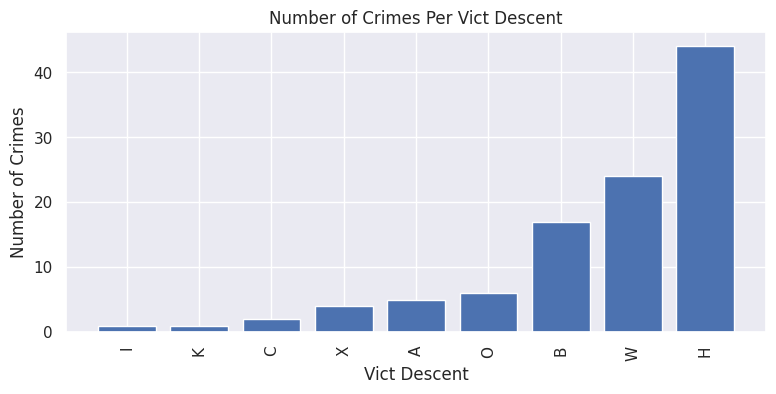

In [ ]:
Count_SSR_V_Descent()

In [ ]:
#Number of Complaints Per Weekday Function
def Count_SSR_Weekday():
    #The SQL query for the Number of Complaints Per Weekday
    q3 = """Select weekday,Count(*) as Count
            From df
            Group By weekday"""
    #Store the output of the SQL query as a dataframe
    df3 = sqldf(q3)
    #Create a figure with the height of 3 and width of 7
    fig = plt.figure(figsize=(7,3))
    #Set the canvas dimensions for the figure
    axes = fig.add_axes([0,0,1,1])
    #Plot the bar chart based on the two attributes
    axes.bar(df3.weekday,df3.Count)
    #Set the X axis label
    axes.set_xlabel('weekday')
    #Set the Y axis label
    axes.set_ylabel('Number of Complaints')
    #Rotate the X axis label to avoid overlapping labels and to show the city
    plt.xticks(rotation=90)
    #Set the title of the bar chart
    axes.set_title('Number of Complaints Per Weekday')

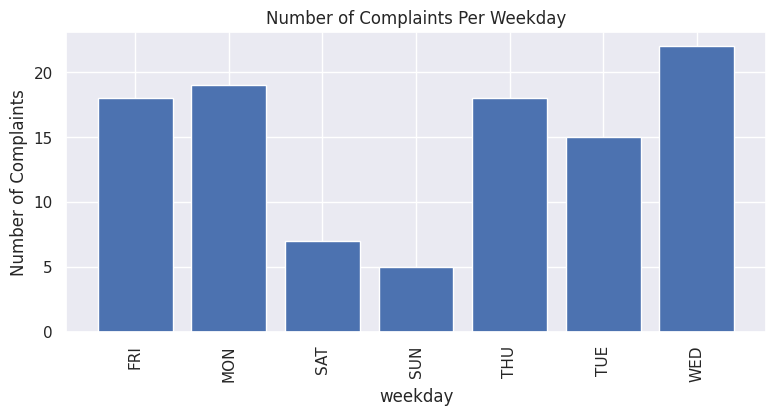

In [ ]:
Count_SSR_Weekday()

In [ ]:
#Distribution of Crimes per Longitude and Latitude
def Long_Lat_Plot():
    #The SQL query for the Distribution of Crimes per Longitude and Latitude
    q4 = """Select LON,LAT
            From df"""
    #Store the output of the SQL query as a dataframe
    df4 = sqldf(q4)
    #Create a figure with the height of 3 and width of 7
    fig = plt.figure(figsize=(7,3))
    #Set the canvas dimensions for the figure
    axes = fig.add_axes([0,0,1,1])
    #Plot the scatter chart based on the geographical location of complaints
    axes.scatter(x=df4.LON, y=df4.LAT, alpha=0.3, cmap='viridis')
    #Set the X axis label
    axes.set_xlabel('Longitude')
    #Set the Y axis label
    axes.set_ylabel('Latitude')
    #Set the title of the scatter chart
    axes.set_title('Distribution of Crimes')

<ipython-input-58-b7ea951585b5>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes.scatter(x=df4.LON, y=df4.LAT, alpha=0.3, cmap='viridis')


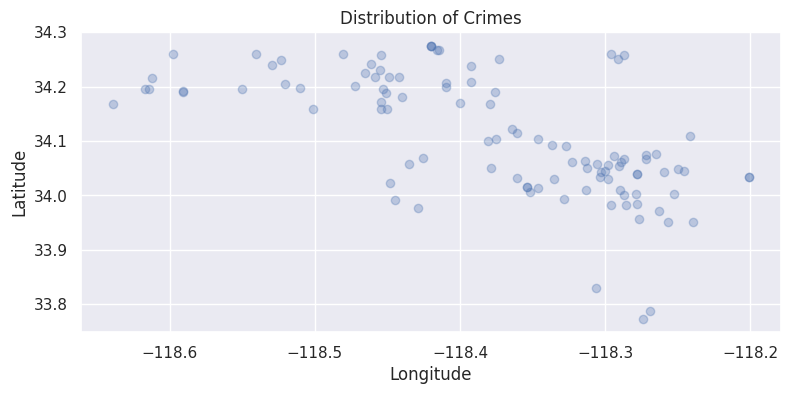

In [ ]:
Long_Lat_Plot()

In [ ]:
df.rename(columns = {'Date Rptd Month':'Date_Rptd_Month'}, inplace = True)
df.rename(columns = {'Date Rptd Day':'Date_Rptd_Day'}, inplace = True)

In [ ]:
#Number of Crimes Per Day in March
def Count_SSR_Day_March():
    #Creating a lambda sqldf function which accepts an sql query and a set of environment variables
    #The lambda sqldf function stores the SQL query output in a dataframe
    pysqldf = lambda q5: sqldf(q5, globals())
    #The SQL query for the Number of Crimes Per Day
    q5 = """Select Date_Rptd_Day,Count(*) as Count
            From df
            Where Date_Rptd_Month = '03'
            Group By Date_Rptd_Day
            Order By Date_Rptd_Day"""
    #Store the output of the SQL query as a dataframe
    df5 = pysqldf(q5)
    #Create a figure with the height of 3 and width of 15
    fig = plt.figure(figsize=(15,3))
    #Set the canvas dimensions for the figure
    axes = fig.add_axes([0,0,1,1])
    #Plot the line chart based on the two attributes and plot markers for each point
    axes.plot(df5.Date_Rptd_Day,df5.Count,marker='o')
    #Set the X axis label
    axes.set_xlabel('Day')
    #Rotate the X axis label to avoid overlapping labels and to show the month and year
    plt.xticks(rotation=90)
    #Set the Y axis label
    axes.set_ylabel('Number of Crimes')
    #Set the title of the line chart
    axes.set_title('Number of Crimes Per Day')

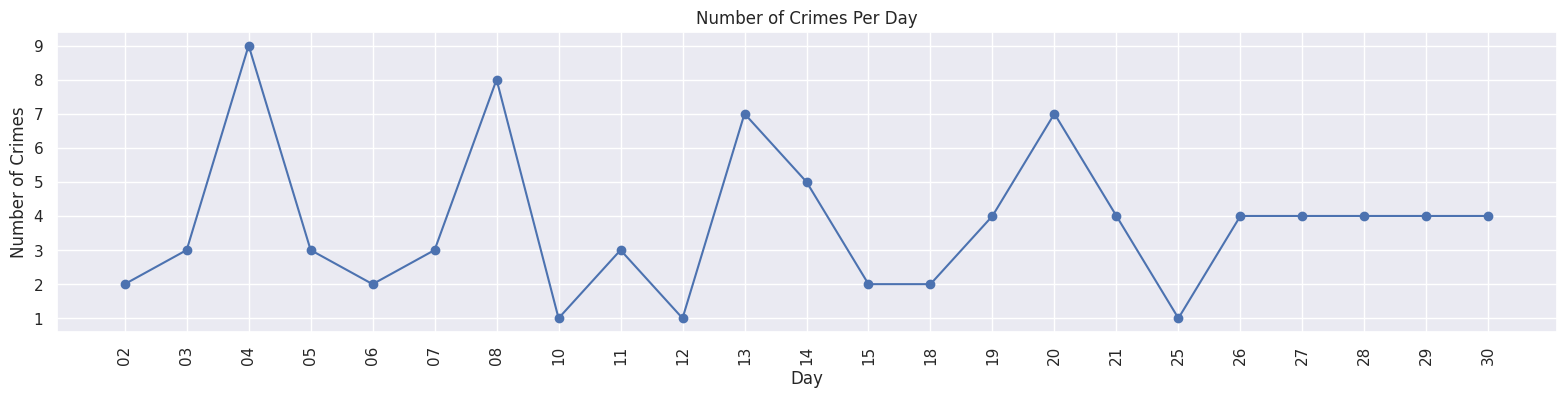

In [ ]:
Count_SSR_Day_March()

In [ ]:
#Percentage of Crimes Per Status Function
def Percentage_SSR_Status():
    #Creating a lambda sqldf function which accepts an sql query and a set of environment variables
    #The lambda sqldf function stores the SQL query output in a dataframe
    pysqldf = lambda q4: sqldf(q4, globals())
    #The SQL query for the Number of Complaints Per Status
    q6 = """Select Status, count(*) * 100.0 / sum(count(*)) over() as Count
            From df
            Group By Status"""
    #Store the output of the SQL query as a dataframe
    df6 = pysqldf(q6)
    #Create a figure with the height of 3 and width of 7
    fig = plt.figure(figsize=(9,5))
    #Set the canvas dimensions for the figure
    axes = fig.add_axes([0,0,1,1])
    #Plot the pie chart based on the status ratio
    axes.pie(df6.Count, labels=df6.Status, autopct='%1.1f%%',
            pctdistance=1.1, labeldistance=1.2)
    # Equal aspect ratio ensures that pie is drawn as a circle.
    axes.axis('equal')
    #Set the title of the piechart
    axes.set_title('Percentage of Crimes Per Status')


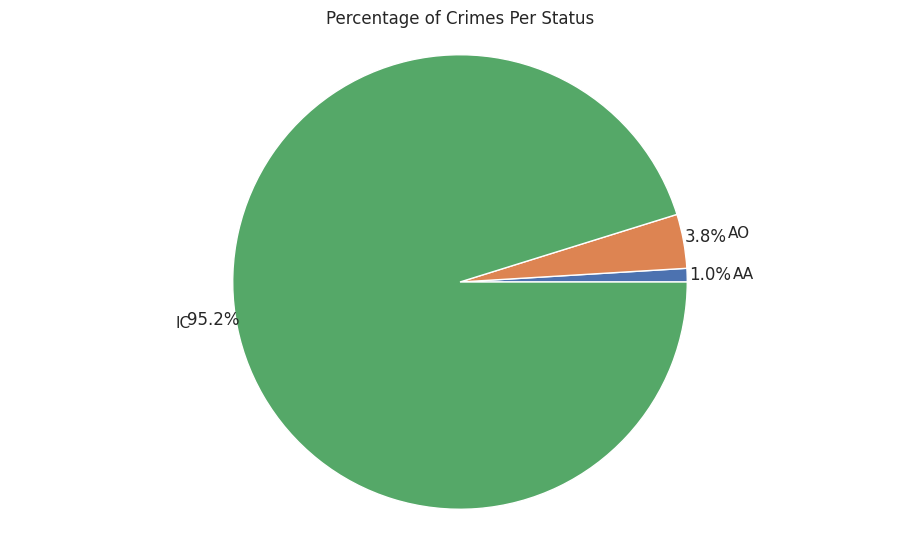

In [ ]:
Percentage_SSR_Status()